### inicializace

In [19]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

# NumPy

* Rychlý a jednoduchý způsob jak pracovat s matematickými problémy v Pythonu
* Je na něm založena velká část dalších vědeckých knihoven (SciPy, BioPython, AstroPy, PyChem, PsychoPy, ...)
* [numpy.org](https://numpy.org/)

## numpy.ndarray

- Základní a jediný datový typ v NumPy
- Multidimenzionální
- Musí bý kompletně definován
- Vytváří se pomocí fce `numpy.array()`
- K jednotlivým prvkům/řádkům se dostaneme téměř jako k v normálním nested array (normální nested array: `a[0][0]` X numpy.ndaray: `a[0, 0]`
- Narozdíl od nested array, lze s ndarray pracovat jako s jedním prvkem

In [22]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(a)
print(type(a))

print(a[0])
print(type(a[0]))

print(a[0, 0])
print(type(a[0, 0]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>
[1 2 3]
<class 'numpy.ndarray'>
1
<class 'numpy.int32'>


In [23]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8]])

print(b)
print(type(b))
print(type(b[0]))
print(type(b[0, 0]))

[list([1, 2, 3]) list([4, 5, 6]) list([7, 8])]
<class 'numpy.ndarray'>
<class 'list'>


<ipython-input-23-ee50655aa6d2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array([[1, 2, 3], [4, 5, 6], [7, 8]])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## "Narovnání" pole
* možnost použít funkce `ravel()` a `flatten()`
* `ravel()` vrací odkaz na původní objekt
* `flatten()` vrací kopii původního objekt

In [24]:
A = np.array([[1,2,3,4],
             [5,6,7,8],
             [9,10,11,12],
             [13,14,15,16]])
print(A)
print('--x--')
A2 = A.ravel()
print(A2)
print('--x--')
A2[0] = 150
print(A2)
print('--x--')
print(A)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
--x--
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
--x--
[150   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16]
--x--
[[150   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]
 [ 13  14  15  16]]


In [25]:
B = np.array([[1,2,3,4],
             [5,6,7,8],
             [9,10,11,12],
             [13,14,15,16]])
print(B)
print('--x--')
B2 = B.flatten()
print(B2)
print('--x--')
B2[0] = 150
print(B2)
print(B)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
--x--
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
--x--
[150   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


# Změna dimenze
* Pomocí fce `reshape()`

In [26]:
A = np.arange(15) # arange(n) vypíše seznam n prvků | arange(n, m) vypíše seznam m-n prvků od n po m-1
print (A)
print('--x--')
A2 = A.reshape(3, 5)
print (A2)
print('--x--')

B = np.arange(10, 16)
print (B)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
--x--
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
--x--
[10 11 12 13 14 15]


## univerzální fce

In [27]:
# np.add() je aliasem pro +

a = 2
b = 3

print(a+b)
print('--x--')
print(np.add(a, b))
print('--x--')

A = np.arange(15).reshape(3, 5)
B = np.arange(10, 15)

print(A + 5)
print('--x--')
print(a + B)

5
--x--
5
--x--
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
--x--
[12 13 14 15 16]


# Příklady

## 1) Největší hodnota menší než x

Zaokrouhlete všechny prvky matice A:
1. dolu (výstup X)
2. nahoru (výstup Y)

In [28]:
def func1(array):
    X = np.floor(array)
    Y = np.ceil(array)
    print(X)
    print(Y)

A = np.random.uniform(-5, 5, (np.random.randint(2, 10), np.random.randint(2, 10)))
print(A)
t1_start = time.perf_counter()
func1(A)
t1_stop = time.perf_counter()
  
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start) 

[[ 0.30921216 -1.18918557 -4.79043904  0.65468023  3.58725818 -1.38152222
  -3.65079412]
 [-4.65520399  0.05176736 -2.52939781  4.04580392  4.73517728  0.30618126
   4.48310497]
 [ 2.14512829  1.88230598 -4.43304385 -1.31140813 -4.21397021  0.22564046
  -4.16110428]
 [-2.6984191   3.90273935 -4.31978571  3.21698097  2.76058736  3.23176826
  -1.72314751]
 [-4.17685174  3.88894806 -3.89944051  3.97792136 -1.54278588 -0.09783171
   4.50215893]]
[[ 0. -2. -5.  0.  3. -2. -4.]
 [-5.  0. -3.  4.  4.  0.  4.]
 [ 2.  1. -5. -2. -5.  0. -5.]
 [-3.  3. -5.  3.  2.  3. -2.]
 [-5.  3. -4.  3. -2. -1.  4.]]
[[ 1. -1. -4.  1.  4. -1. -3.]
 [-4.  1. -2.  5.  5.  1.  5.]
 [ 3.  2. -4. -1. -4.  1. -4.]
 [-2.  4. -4.  4.  3.  4. -1.]
 [-4.  4. -3.  4. -1. -0.  5.]]
Elapsed time during the whole program in seconds: 0.004078199999639764


In [29]:
# ukázka bez NumPy
import math
def func1_1(array):
    X = array()
    Y = array()
    for i, row in enumerate(array):
        temp1 = array()
        temp2 = array()
        for j, item in enumerate(row):
            temp1[j] = math.floor(item)
            temp2[i] = math.ceil(item)
        X[i] = temp1
        Y[i] = temp2
    print (X)
    print (Y)

A = A.tolist()
t1_start = time.perf_counter()
func1(A)
t1_stop = time.perf_counter()
  
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start) 

[[ 0. -2. -5.  0.  3. -2. -4.]
 [-5.  0. -3.  4.  4.  0.  4.]
 [ 2.  1. -5. -2. -5.  0. -5.]
 [-3.  3. -5.  3.  2.  3. -2.]
 [-5.  3. -4.  3. -2. -1.  4.]]
[[ 1. -1. -4.  1.  4. -1. -3.]
 [-4.  1. -2.  5.  5.  1.  5.]
 [ 3.  2. -4. -1. -4.  1. -4.]
 [-2.  4. -4.  4.  3.  4. -1.]
 [-4.  4. -3.  4. -1. -0.  5.]]
Elapsed time during the whole program in seconds: 0.0013818000002174813


## 2) Graf

Nakreslete sloupcový graf se jménem ***Average Ratings on the Training Set***

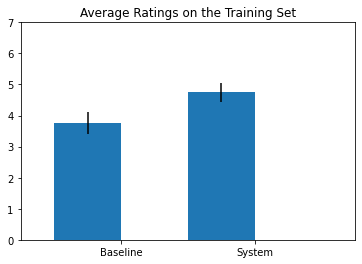

In [30]:
labels = ["Baseline", "System"]
data =   [3.75, 4.75]
error =  [0.3497, 0.3108]

xlocations = np.array(range(len(data)))+0.5
width = 0.5
plt.bar(xlocations, data, yerr = error, width=width)
plt.yticks(range(0, 8))
plt.xticks(xlocations + width/2, labels)
plt.xlim(0, xlocations[-1]+width*2)
plt.title("Average Ratings on the Training Set")
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()

plt.show()

## Příklady poctivě převzaté

### Tlmený harmonický oscilátor

Vykreslite časovú zmenu amplitúdy tlmeného harmonického oscilátora s dekrementom útlmu $\lambda = 1$ a nulovou počiatočnou fázou. Za riešenie periódy kmitov považujte $T=1~\mathrm{s}$. Maximálna amplitúda je $A=1$.

* Amplitúda kmitov: $y(t) = A\exp(-\lambda t) \cos(2\pi f t + \phi)$
    - $A$ je maximálna amplitúda
    - $\lambda$ je koeficient útlmu
    - $\phi$ je fáza v počiatku časovej osi.

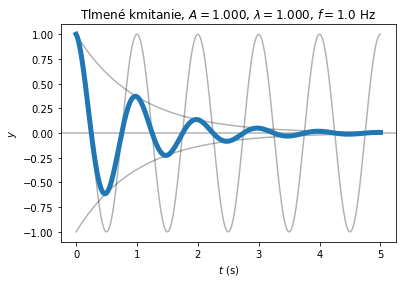

In [31]:
A = 1 # Amplitúda kmitov
lambda_ = 1 # logaritmický dekrement útlmu
phi = 0 # Počiatočná fáza
f = 1 # Frekvencia

# Výpočet uhlovej frekvencie
omega = 2 * np.pi * f

# Príprava časovej osi
t = np.linspace(0, 5, num=300)

# Výpočet 
x = np.exp(-lambda_ * t) * np.cos(omega * t + phi)
x_undamped = np.cos(omega * t + phi)
damping = np.exp(-lambda_ * t)

fig, ax = plt.subplots()

# Pomocné čiary a grafy
ax.axhline(0, color='k', alpha=.3)
ax.plot(t, x_undamped, 'k', alpha=.3)
ax.plot(t, damping, 'k', alpha=.3)
ax.plot(t, -damping, 'k', alpha=.3)

# Tlmené kmitanie
ax.plot(t, x, lw=5)

# Nadpis, popis osí
plt.title(r'Tlmené kmitanie, $A=${:.3f}, $\lambda=${:.3f}, $f={:.1f}~$Hz'.format(A, lambda_, f))
ax.set_xlabel(r'$t~(\mathrm{s})$')
ax.set_ylabel(r'$y$')

plt.show()

### Mandelbrotova množina

* Je to množina komplexných čísel $z$, pre ktoré funkcia $f(z) = z^2 + c$ pri nekonečnej iterácii počínajúcej v $z=0+0\jmath$ *konverguje*.
    * Iterácia funkcie $f$: $f(f(f(\cdots f(f(z))\cdots )))$
* Možno ju zobraziť ako obrázok
    * Istý výsek komplexnej roviny rozdelíme
    * V každom bode delenia vyhodnotíme, či je preň podmienka príslušnosti do Mandelbrotovej množiny splnená
    * Pokiaľ áno, vykreslíme príslušný pixel (alebo množinu pixelov) farbou $F_1$, pokiaľ do Mandelbrotovej množiny nepatrí, vykreslíme ho (ju) farbou $F_2$
* Vizualizácia sa dá ale urobiť ešte krajšie (i keď z hľadiska vyhodnotenia príslušnosti čísel k Mandelbrotovej množine menej informatívne):
    * Zvolíme si hodnotu prahu $t$ a hodnotu maximálneho počtu iterácií $m$.
    * Pokiaľ po $n$ iteráciach dosiahne hodnota iterovanej funkcie v čísle $z$ hodnotu $t$, prehlásime číslo $z$ za nemandelbrotovské. Priradíme mu však hodnotu $n$
    * Pokiaľ v bode $z$ ani po $m$ iteráciach nedosiahne iterovaná funkcia hodnotu $t$, priradíme číslu $z$ hodnotu $n=0$.
    * Maticu čísel $\{n\}$ pre skúmaný výsek komplexnej roviny namapujeme na farebnú škálu a vykreslíme.

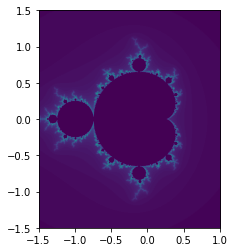

In [32]:
def mandelbrot(xlim, ylim, n_real=1000, n_imag=1000, threshold_value=3., threshold_iterations=100):
    x = np.linspace(*xlim, n_real, dtype=np.float32)
    y = np.linspace(*ylim, n_imag, dtype=np.float32)
    c = x + y.reshape(len(y), 1) * 1j # Komplexné čísla v skúmanom výseku
    n = np.zeros_like(c, dtype=int) # Počty iterácií
    z = np.zeros_like(c, dtype=np.complex64) # Medzivýsledky iterácie
    
    for i in range(threshold_iterations):
        where_less = np.less(np.abs(z), threshold_value)
        n[where_less] = i
        z[where_less] = z[where_less] ** 2 + c[where_less]
        
    n[n == threshold_iterations - 1] = 0
    # n[n != 0] = 1 # Pre binárny výstup
    
    return n

xlim = [-1.5, 1]
ylim = [-1.5, 1.5]

n = mandelbrot(xlim, ylim)

fig, ax = plt.subplots()
ax.imshow(n, extent=xlim + ylim)

plt.show()